In [25]:
import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.colors import Normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
df = pd.read_csv('../Datos/dataset_muestra60.csv')

ocupacion_columns = ['Ocupacion del Hombre', 'Ocupacion de la Mujer']

df['Clase de Union'] = df['Clase de Union'].replace(9, np.nan)
df['Numero de Nupcias del Hombre'] = df['Numero de Nupcias del Hombre'].replace(9, np.nan)
df['Numero de Nupcias de la Mujer'] = df['Numero de Nupcias de la Mujer'].replace(9, np.nan)
df['Edad del Hombre'] = df['Edad del Hombre'].replace(999, np.nan)
df['Edad de la Mujer'] = df['Nacionalidad de la Mujer'].replace(999, np.nan)
df['Pueblo de Pertenencia del Hombre'] = df['Pueblo de Pertenencia del Hombre'].replace(9, np.nan)
df['Pueblo de Pertenencia de la Mujer'] = df['Pueblo de Pertenencia de la Mujer'].replace(9, np.nan)
df['Nacionalidad del Hombre'] = df['Nacionalidad del Hombre'].replace(9999, np.nan)
df['Nacionalidad de la Mujer'] = df['Nacionalidad de la Mujer'].replace(9999, np.nan)
df['Escolaridad del Hombre'] = df['Escolaridad del Hombre'].replace(9, np.nan)
df['Escolaridad de la Mujer'] = df['Escolaridad de la Mujer'].replace(9, np.nan)
df['Ocupacion del Hombre'] = df['Ocupacion del Hombre'].replace(99, np.nan)
df['Ocupacion de la Mujer'] = df['Ocupacion de la Mujer'].replace(99, np.nan)
df[ocupacion_columns] = df[ocupacion_columns].replace(["IGNORADO", "NEOG"], np.nan)
df['Area Geografica de la Ocurrencia'] = df['Area Geografica de la Ocurrencia'].replace(9, np.nan)


C:\Users\villa\AppData\Local\Temp\ipykernel_11608\3754933601.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Datos/dataset_muestra60.csv')


In [27]:
# Cargar los datos

# 3. Seleccionar las características para el modelo
selected_features = [
    "Ano Ocurrencia", 
    "Departamento de Ocurrencia", 
    "Edad del Hombre", 
    "Edad de la Mujer",
    "Escolaridad del Hombre",
    "Escolaridad de la Mujer"
]

# Preparar los datos
X = df[selected_features].copy()
y = df['divorcio']

# Manejar valores faltantes en características numéricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')
X[numeric_features] = imputer.fit_transform(X[numeric_features])

# Manejar valores faltantes en características categóricas
categorical_features = X.select_dtypes(include=['object']).columns
X[categorical_features] = X[categorical_features].fillna('None')

# Objetos de preprocesamiento para pipeline de modelos
preprocesador_categorico = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocesador_numerico = StandardScaler()

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [28]:
# Generación de preprocesador
preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_categorico, categorical_features),
    ('standard_scaler',preprocesador_numerico, numeric_features)
])

# Modelos

### Modelo 1

In [ ]:
knn_modelo1 = make_pipeline(preprocesador, KNeighborsClassifier(
    algorithm='ball_tree',
    n_neighbors=12,
    p=1,  # Distancia Manhattan
    weights='distance')
)

start = time.time()
knn_modelo1.fit(X_train, y_train)
tiempo_entrenamiento_knn1 = time.time() - start
y_pred_knn1 = knn_modelo1.predict(X_test)
accuracy_knn1 = accuracy_score(y_test, y_pred_knn1)

print(f"Accuracy del modelo KNN 1: {accuracy_knn1:.4f}")
print(f"Tiempo de entrenamiento KNN 1: {tiempo_entrenamiento_knn1:.2f} segundos")


### Modelo 2

In [ ]:
knn_modelo2 = make_pipeline(preprocesador, KNeighborsClassifier(
    algorithm='kd_tree',
    n_neighbors=8,
    p=2,  # Distancia Euclidiana
    weights='uniform')
)

start = time.time()
knn_modelo2.fit(X_train, y_train)
tiempo_entrenamiento_knn2 = time.time() - start
y_pred_knn2 = knn_modelo2.predict(X_test)
accuracy_knn2 = accuracy_score(y_test, y_pred_knn2)

print(f"Accuracy del modelo KNN 2: {accuracy_knn2:.4f}")
print(f"Tiempo de entrenamiento KNN 2: {tiempo_entrenamiento_knn2:.2f} minutos")


Accuracy del modelo KNN 2: 0.7696
Tiempo de entrenamiento KNN 2: 0.49 minutos


### Modelo 3

In [ ]:
knn_modelo3 = make_pipeline(preprocesador, KNeighborsClassifier(
    algorithm='auto',
    n_neighbors=15,
    p=1.5,  # Distancia Minkowski con p=1.5
    weights='distance',
    leaf_size=50)
)

start = time.time()
knn_modelo3.fit(X_train, y_train)
tiempo_entrenamiento_knn3 = time.time() - start
y_pred_knn3 = knn_modelo3.predict(X_test)
accuracy_knn3 = accuracy_score(y_test, y_pred_knn3)

print(f"Accuracy del modelo KNN 3: {accuracy_knn3:.4f}")
print(f"Tiempo de entrenamiento KNN 3: {tiempo_entrenamiento_knn3:.2f} mimutos")


Accuracy del modelo KNN 3: 0.7764
Tiempo de entrenamiento KNN 3: 0.48 mimutos


In [ ]:

# Modelo con SMOTE para balanceo de clases
knn_modelo4 = make_pipeline(preprocesador, KNeighborsClassifier(
    algorithm='auto',
    n_neighbors=20,  # Más vecinos para suavizar el efecto de SMOTE
    p=1.5,  # Distancia de Minkowski
    weights='distance')
)

start = time.time()
knn_modelo4.fit(X_train, y_train)
tiempo_entrenamiento_knn4 = time.time() - start
y_pred_knn4 = knn_modelo4.predict(X_test)
accuracy_knn4 = accuracy_score(y_test, y_pred_knn4)

print(f"Accuracy del modelo KNN 4 (SMOTE): {accuracy_knn4:.4f}")
print(f"Tiempo de entrenamiento KNN 4: {tiempo_entrenamiento_knn4:.2f} segundos")
print("\nReporte de Clasificación KNN 4:")
print(classification_report(y_test, y_pred_knn4))


Accuracy del modelo KNN 4 (SMOTE): 0.7769
Tiempo de entrenamiento KNN 4: 0.43 segundos

Reporte de Clasificación KNN 4:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71     40889
           1       0.80      0.84      0.82     61334

    accuracy                           0.78    102223
   macro avg       0.77      0.76      0.76    102223
weighted avg       0.78      0.78      0.78    102223



In [ ]:
# Modelo con Selección de Características
from sklearn.feature_selection import SelectKBest, f_classif

# Crear pipeline con selección de características
knn_modelo5 = make_pipeline(
    preprocesador,
    SelectKBest(score_func=f_classif, k=4),  # Seleccionar las 4 mejores características
    KNeighborsClassifier(
        n_neighbors=25,  # Mayor número de vecinos
        weights='distance',
        algorithm='ball_tree',
        p=2  # Distancia Euclidiana
    )
)

start = time.time()
knn_modelo5.fit(X_train, y_train)
tiempo_entrenamiento_knn5 = time.time() - start
y_pred_knn5 = knn_modelo5.predict(X_test)
accuracy_knn5 = accuracy_score(y_test, y_pred_knn5)

print(f"\nAccuracy del modelo KNN 5 (Selección Características): {accuracy_knn5:.4f}")
print(f"Tiempo de entrenamiento KNN 5: {tiempo_entrenamiento_knn5:.2f} segundos")
print("\nReporte de Clasificación KNN 5:")
print(classification_report(y_test, y_pred_knn5))

# Comparación de modelos
print("\nComparación de Modelos KNN:")
modelos = ['KNN 1', 'KNN 2', 'KNN 3', 'KNN 4 (SMOTE)', 'KNN 5 (Selección)']
accuracies = [accuracy_knn1, accuracy_knn2, accuracy_knn3, accuracy_knn4, accuracy_knn5]

comparacion_df = pd.DataFrame({
    'Modelo': modelos,
    'Accuracy': accuracies
})

print(comparacion_df.sort_values('Accuracy', ascending=False))


Accuracy del modelo KNN 5 (Selección Características): 0.7946
Tiempo de entrenamiento KNN 5: 0.64 segundos

Reporte de Clasificación KNN 5:
              precision    recall  f1-score   support

           0       0.78      0.68      0.72     40889
           1       0.80      0.87      0.84     61334

    accuracy                           0.79    102223
   macro avg       0.79      0.77      0.78    102223
weighted avg       0.79      0.79      0.79    102223


Comparación de Modelos KNN:
              Modelo  Accuracy
4  KNN 5 (Selección)  0.794606
3      KNN 4 (SMOTE)  0.776909
2              KNN 3  0.776440
0              KNN 1  0.774366
1              KNN 2  0.769631


# Comparación 

In [ ]:
# Comparación de los tres modelos KNN
modelos = ['KNN 1', 'KNN 2', 'KNN 3']
accuracies = [accuracy_knn1, accuracy_knn2, accuracy_knn3]
tiempos = [tiempo_entrenamiento_knn1, tiempo_entrenamiento_knn2, tiempo_entrenamiento_knn3]

comparacion_df = pd.DataFrame({
    'Modelo': modelos,
    'Configuración': [
        'ball_tree, n=12, Manhattan, distance', 
        'kd_tree, n=8, Euclidiana, uniform', 
        'auto, n=15, Minkowski p=1.5, distance'
    ],
    'Accuracy': accuracies,
    'Tiempo de entrenamiento (s)': tiempos
})

print(comparacion_df.sort_values('Accuracy', ascending=False))

  Modelo                          Configuración  Accuracy  \
2  KNN 3  auto, n=15, Minkowski p=1.5, distance  0.776440   
0  KNN 1   ball_tree, n=12, Manhattan, distance  0.774366   
1  KNN 2      kd_tree, n=8, Euclidiana, uniform  0.769631   

   Tiempo de entrenamiento (s)  
2                     0.482997  
0                     0.429314  
1                     0.491767  


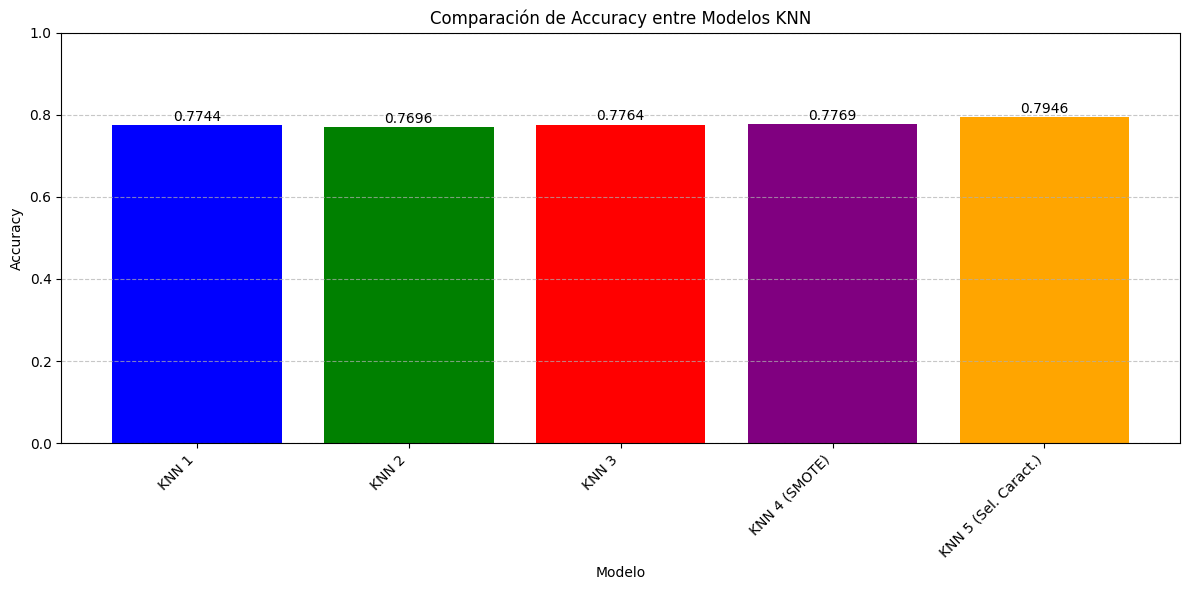

In [ ]:
# Gráfico  comparativo de accuracy
plt.figure(figsize=(12, 6))
modelos = ['KNN 1', 'KNN 2', 'KNN 3', 'KNN 4 (SMOTE)', 'KNN 5 (Sel. Caract.)']
accuracies = [accuracy_knn1, accuracy_knn2, accuracy_knn3, accuracy_knn4, accuracy_knn5]
colores = ['blue', 'green', 'red', 'purple', 'orange']

plt.bar(modelos, accuracies, color=colores)

# Añadir etiquetas y título
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy entre Modelos KNN')

# Mostrar valores sobre las barras
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.ylim(0, 1)  # Establecer límite en el aje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
print("Reporte de clasificación para Modelo 1:\n", classification_report(y_test, y_pred_knn1))
print("\nReporte de clasificación para Modelo 2:\n", classification_report(y_test, y_pred_knn2))
print("\nReporte de clasificación para Modelo 3:\n", classification_report(y_test, y_pred_knn3))


Reporte de clasificación para Modelo 1:
               precision    recall  f1-score   support

           0       0.73      0.68      0.71     40889
           1       0.80      0.84      0.82     61334

    accuracy                           0.77    102223
   macro avg       0.77      0.76      0.76    102223
weighted avg       0.77      0.77      0.77    102223


Reporte de clasificación para Modelo 2:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71     40889
           1       0.81      0.81      0.81     61334

    accuracy                           0.77    102223
   macro avg       0.76      0.76      0.76    102223
weighted avg       0.77      0.77      0.77    102223


Reporte de clasificación para Modelo 3:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71     40889
           1       0.80      0.84      0.82     61334

    accuracy                           0.78    102223
   

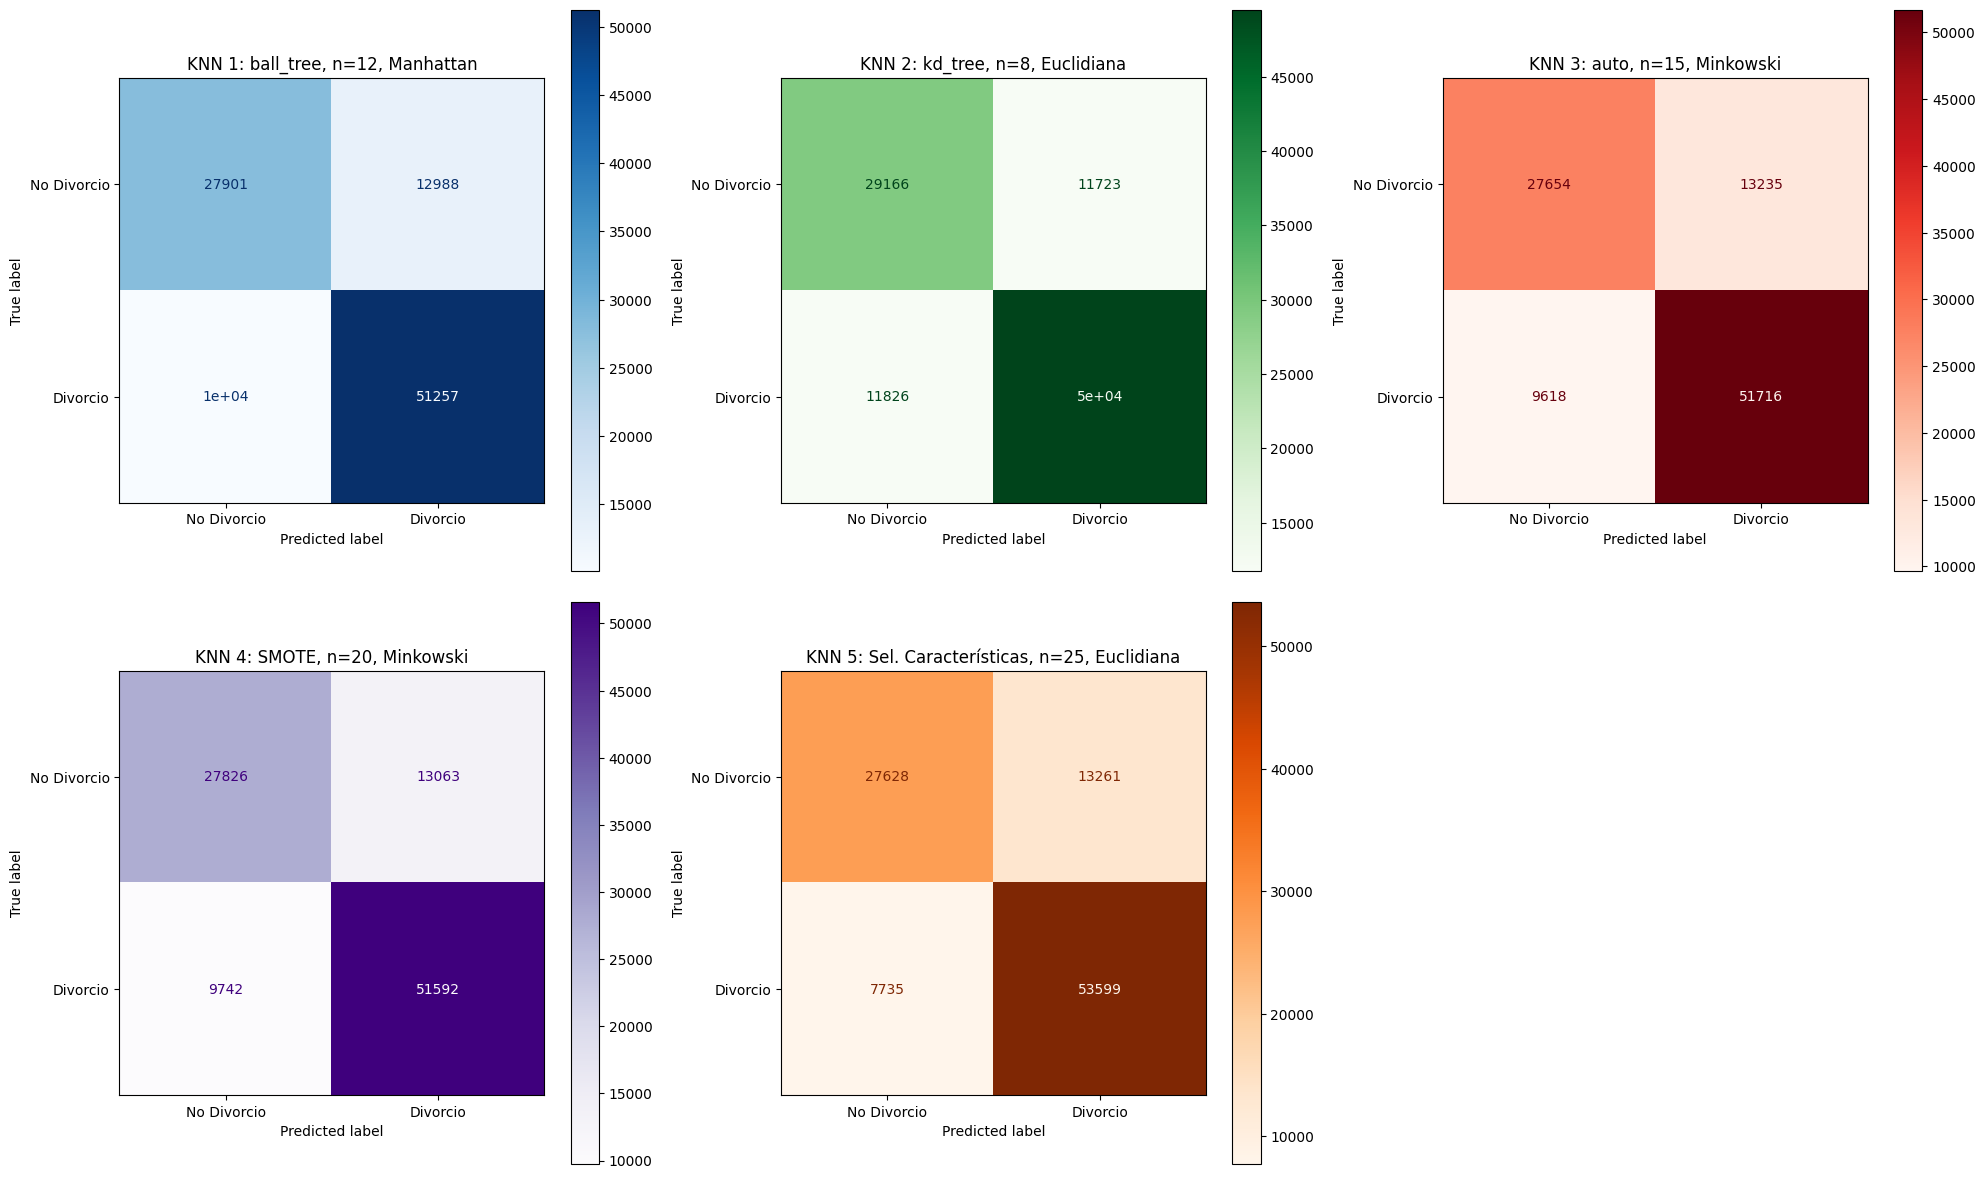


Análisis Comparativo de Modelos KNN:
                 Modelo  Accuracy                                  Algoritmo
4  KNN 5 (Sel. Caract.)  0.794606  ball_tree, n=25, Euclidiana, Sel. Caract.
3         KNN 4 (SMOTE)  0.776909               auto, n=20, Minkowski, SMOTE
2                 KNN 3  0.776440                      auto, n=15, Minkowski
0                 KNN 1  0.774366                 ball_tree, n=12, Manhattan
1                 KNN 2  0.769631                   kd_tree, n=8, Euclidiana

Métricas detalladas:

Clasificación Modelo KNN 1:
              precision    recall  f1-score   support

           0       0.73      0.68      0.71     40889
           1       0.80      0.84      0.82     61334

    accuracy                           0.77    102223
   macro avg       0.77      0.76      0.76    102223
weighted avg       0.77      0.77      0.77    102223


Clasificación Modelo KNN 2:
              precision    recall  f1-score   support

           0       0.71      0.71     

In [ ]:
# Matrices de confusión para los cinco modelos KNN
# Calcular matrices de confusión
cm_knn1 = confusion_matrix(y_test, y_pred_knn1)
cm_knn2 = confusion_matrix(y_test, y_pred_knn2)
cm_knn3 = confusion_matrix(y_test, y_pred_knn3)
cm_knn4 = confusion_matrix(y_test, y_pred_knn4)
cm_knn5 = confusion_matrix(y_test, y_pred_knn5)

# Visualización conjunta de las cinco matrices de confusión
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Aplanar el array de axes para facilitar indexación
axes = axes.ravel()

# Matrices de confusión con sus títulos
matrices = [
    (cm_knn1, 'KNN 1: ball_tree, n=12, Manhattan', 'Blues'),
    (cm_knn2, 'KNN 2: kd_tree, n=8, Euclidiana', 'Greens'),
    (cm_knn3, 'KNN 3: auto, n=15, Minkowski', 'Reds'),
    (cm_knn4, 'KNN 4: SMOTE, n=20, Minkowski', 'Purples'),
    (cm_knn5, 'KNN 5: Sel. Características, n=25, Euclidiana', 'Oranges')
]

# Graficar matrices de confusión
for i, (cm, titulo, color) in enumerate(matrices):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Divorcio', 'Divorcio'])
    disp.plot(ax=axes[i], cmap=color)
    axes[i].set_title(titulo)

# Eliminar el sexto subplot si existe
if len(axes) > len(matrices):
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Análisis comparativo detallado
print("\nAnálisis Comparativo de Modelos KNN:")
comparacion_detallada = pd.DataFrame({
    'Modelo': ['KNN 1', 'KNN 2', 'KNN 3', 'KNN 4 (SMOTE)', 'KNN 5 (Sel. Caract.)'],
    'Accuracy': [accuracy_knn1, accuracy_knn2, accuracy_knn3, accuracy_knn4, accuracy_knn5],
    'Algoritmo': [
        'ball_tree, n=12, Manhattan', 
        'kd_tree, n=8, Euclidiana', 
        'auto, n=15, Minkowski', 
        'auto, n=20, Minkowski, SMOTE', 
        'ball_tree, n=25, Euclidiana, Sel. Caract.'
    ]
})

print(comparacion_detallada.sort_values('Accuracy', ascending=False))

# Análisis de métricas detalladas
print("\nMétricas detalladas:")
metricas = [
    classification_report(y_test, y_pred_knn1),
    classification_report(y_test, y_pred_knn2),
    classification_report(y_test, y_pred_knn3),
    classification_report(y_test, y_pred_knn4),
    classification_report(y_test, y_pred_knn5)
]

for i, metrica in enumerate(metricas, 1):
    print(f"\nClasificación Modelo KNN {i}:")
    print(metrica)